In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Data.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

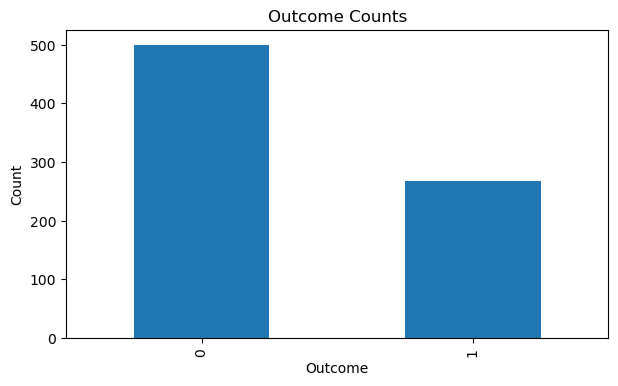

In [6]:
data['Outcome'].value_counts().plot(kind='bar',figsize=(7,4))
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Counts')
plt.show()

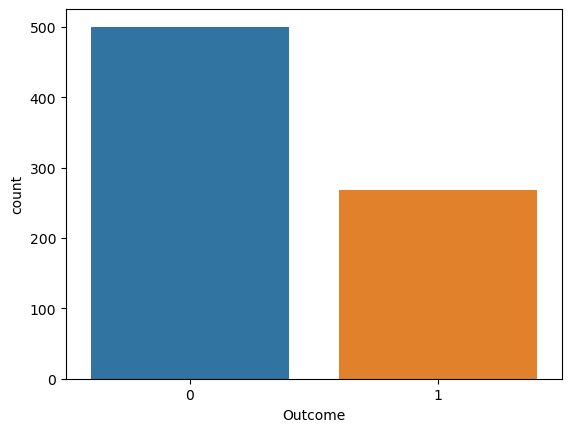

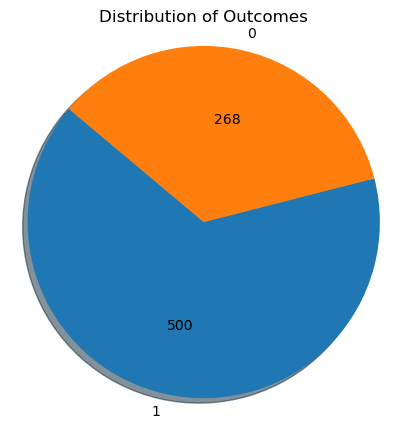

In [7]:
countplot_data = sns.countplot(x='Outcome', data=data)
total_count = len(data)
# Extract counts and categories from the countplot data
counts = [p.get_height() for p in countplot_data.patches]
categories = data['Outcome'].unique()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=categories, autopct=lambda p: f'{p * total_count / 100 :.0f}', startangle=140, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular.

# Set the chart title
plt.title('Distribution of Outcomes')

# Show the pie chart
plt.show()

In [8]:
data.shape

(768, 9)

In [9]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


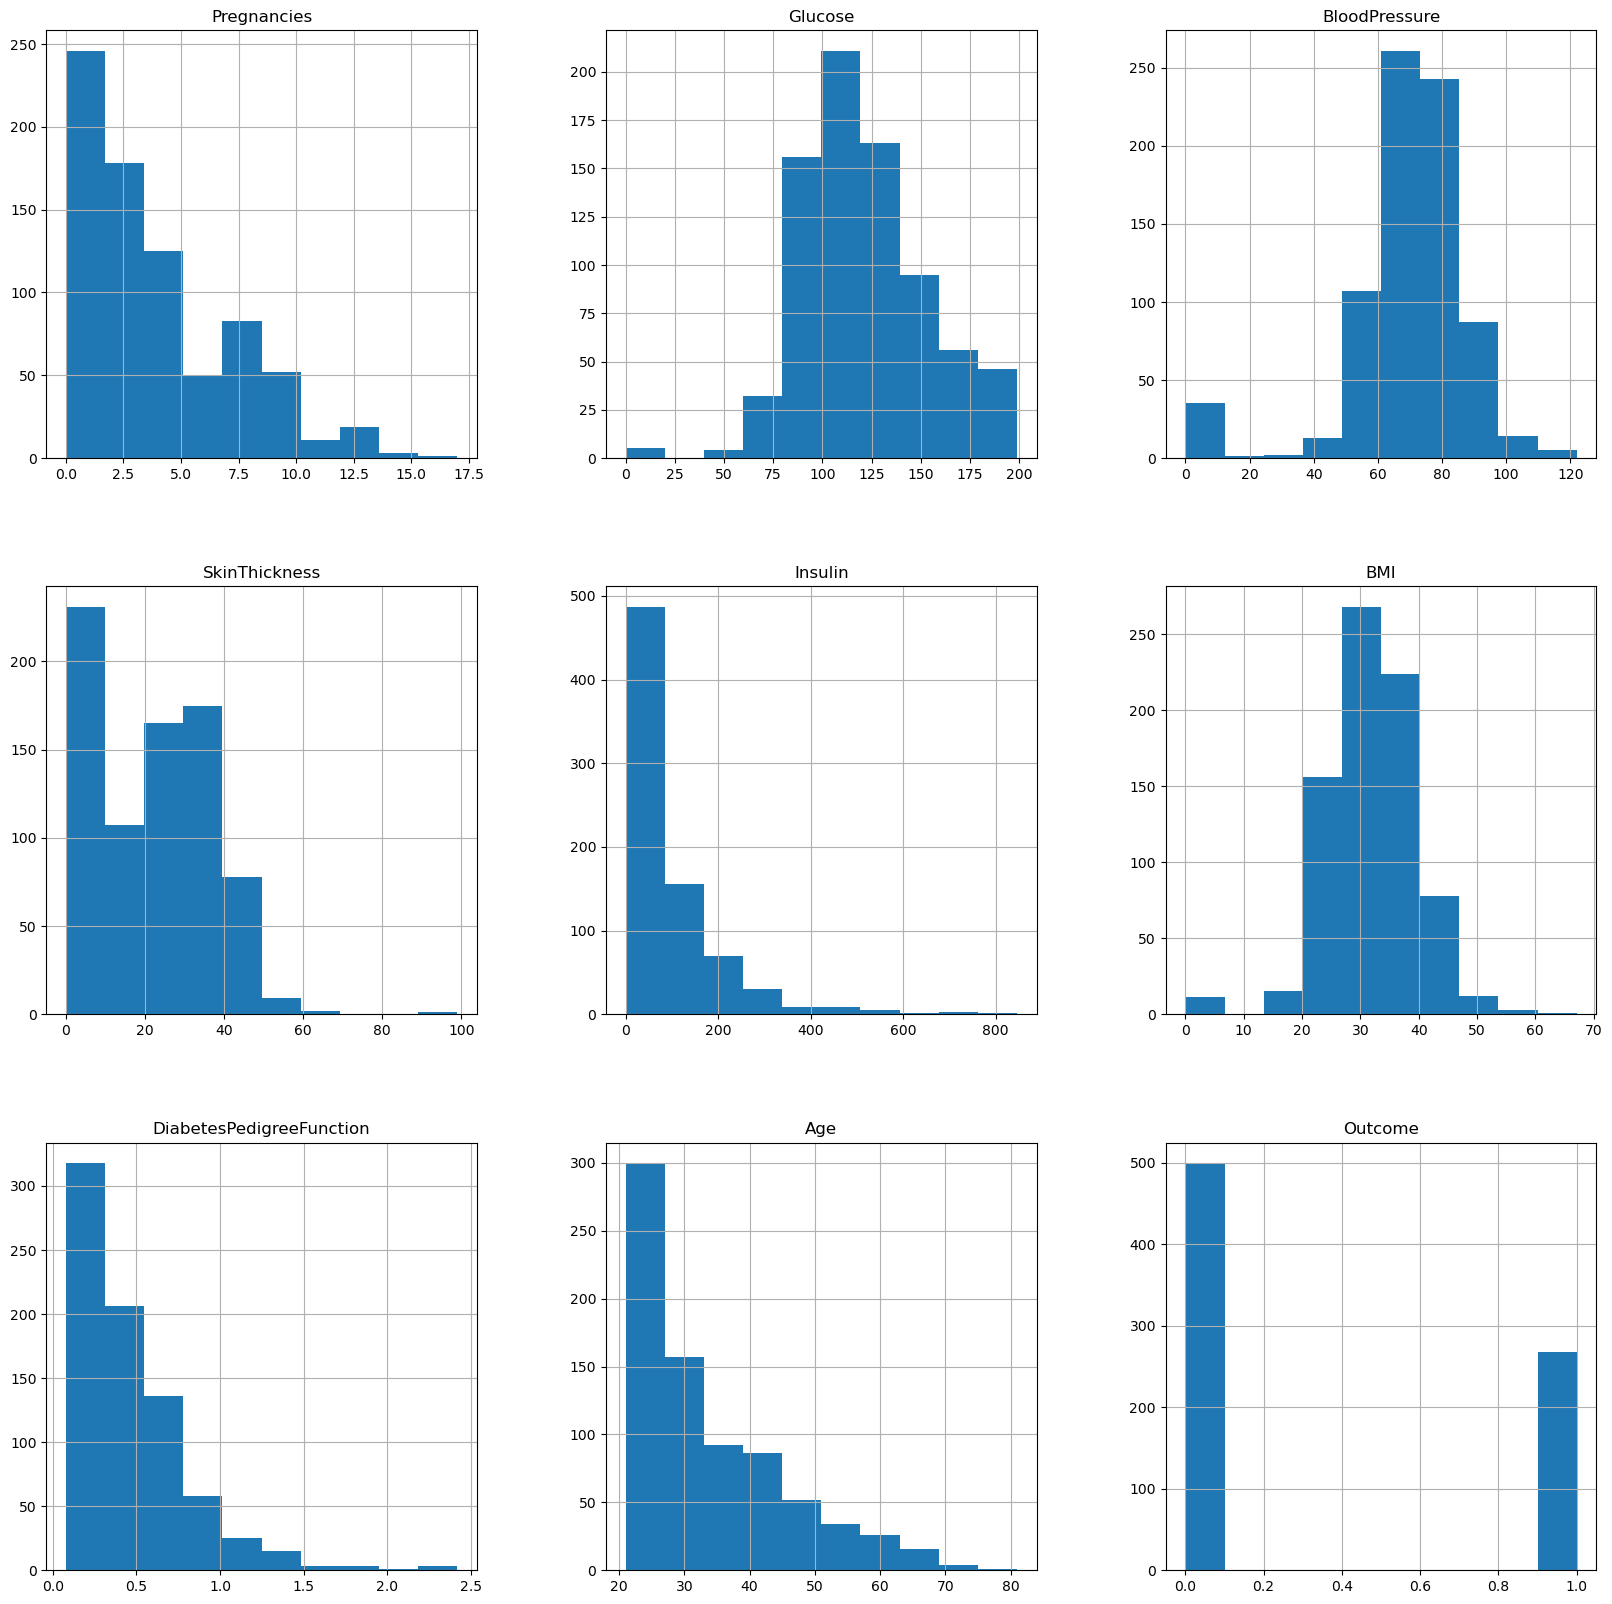

In [10]:
# Histogram of data
data.hist(figsize=(20,20))
plt.show()

In [11]:
columns_to_replace_Zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace_Zero:
    mean_value = data[data[column] != 0][column].mean()  
    data[column] = data[column].replace(0, mean_value)

In [12]:
# Data check after replaceing zero values
data.describe().transpose().round(2) #Updated values

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,121.69,30.44,44.00,99.75,117.00,140.25,199.00
BloodPressure,768.0,72.41,12.10,24.00,64.00,72.20,80.00,122.00
SkinThickness,768.0,29.15,8.79,7.00,25.00,29.15,32.00,99.00
Insulin,768.0,155.55,85.02,14.00,121.50,155.55,155.55,846.00
BMI,768.0,32.46,6.88,18.20,27.50,32.40,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


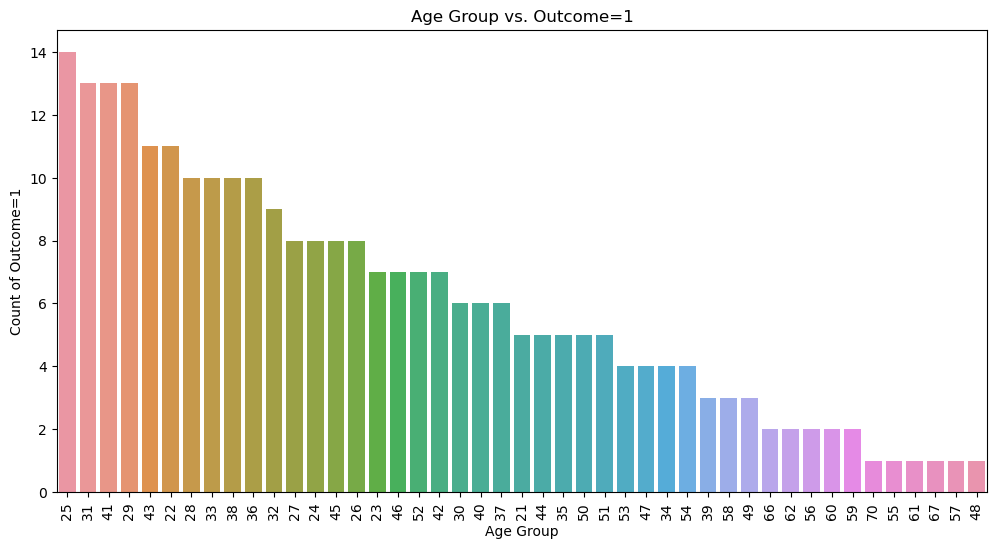

In [13]:
# Check age group with the highest number of diabetic patients
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=data[data['Outcome'] == 1], order=data[data['Outcome'] == 1]['Age'].value_counts().index)
plt.title('Age Group vs. Outcome=1')
plt.xlabel('Age Group')
plt.ylabel('Count of Outcome=1')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [14]:
correlation_matrix = data.corr().round(2)
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.21,0.08,0.06,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.22,0.19,0.42,0.23,0.14,0.27,0.49
BloodPressure,0.21,0.22,1.00,0.19,0.07,0.28,-0.00,0.32,0.17
SkinThickness,0.08,0.19,0.19,1.00,0.16,0.54,0.10,0.13,0.22
Insulin,0.06,0.42,0.07,0.16,1.00,0.17,0.10,0.14,0.21
BMI,0.02,0.23,0.28,0.54,0.17,1.00,0.15,0.03,0.31
DiabetesPedigreeFunction,-0.03,0.14,-0.00,0.10,0.10,0.15,1.00,0.03,0.17
Age,0.54,0.27,0.32,0.13,0.14,0.03,0.03,1.00,0.24
Outcome,0.22,0.49,0.17,0.22,0.21,0.31,0.17,0.24,1.00


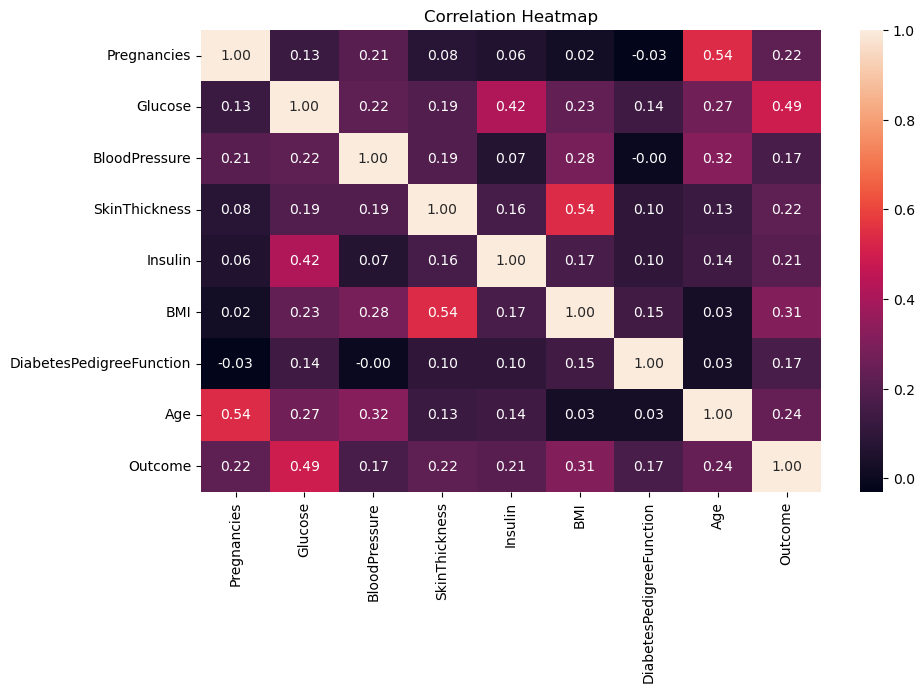

In [15]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1000x600 with 0 Axes>

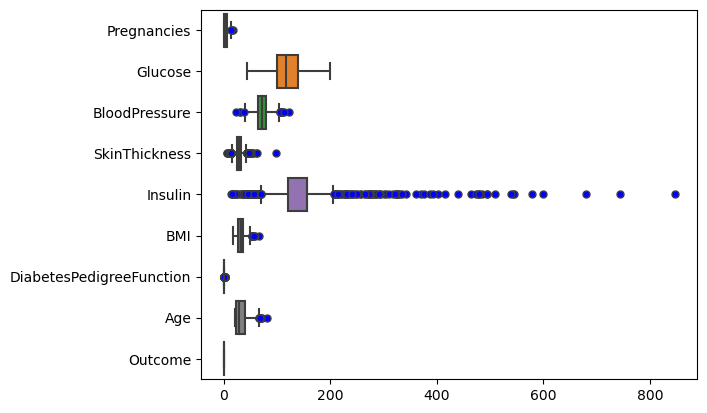

<Figure size 1000x600 with 0 Axes>

In [16]:
sns.boxplot(data, orient='h', flierprops={'markerfacecolor': 'blue', 'marker': 'o'})
plt.figure(figsize=(10,6))

In [17]:
from sklearn.utils import resample
majority_class = data[data['Outcome'] == 0]
minority_class = data[data['Outcome'] == 1]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

In [18]:
augmented_data = pd.concat([majority_class, minority_upsampled])
data=augmented_data

In [19]:
data.shape

(1000, 9)

In [20]:
# Splitting data in features and output column.
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = data['Outcome'].values

In [21]:
# Scaling the input features into standardscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
#X = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52)

In [23]:
X_test

array([[0.05882353, 0.72903226, 0.48979592, ..., 0.15132924, 0.01921435,
        0.05      ],
       [0.17647059, 0.83225806, 0.6122449 , ..., 0.35787321, 0.07685739,
        0.01666667],
       [0.23529412, 0.42580645, 0.42857143, ..., 0.2801636 , 0.16780529,
        0.13333333],
       ...,
       [0.41176471, 0.96774194, 0.44897959, ..., 0.36196319, 0.28479932,
        0.33333333],
       [0.58823529, 0.45806452, 0.49393045, ..., 0.34969325, 0.02391119,
        0.13333333],
       [0.11764706, 0.41290323, 0.57142857, ..., 0.1799591 , 0.07728437,
        0.51666667]])

In [24]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=110, random_state=42,criterion='entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=110, random_state=42)

In [25]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
# Suport vector machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [27]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [28]:
# Navie bayes
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [30]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

In [31]:
# LR
lr_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, lr_pred)
# KNN
knn_pred = knn.predict(X_test)
test_ac = accuracy_score(y_test, knn_pred)
# NB
nb_pred = nb.predict(X_test)
test_acc = accuracy_score(y_test, nb_pred)
# SVM
svc_pred = svc.predict(X_test)
test_accu = accuracy_score(y_test, svc_pred)
# RF
rf_pred = model.predict(X_test)
test_accur = accuracy_score(y_test, rf_pred)
# DT
dt_pred = dt.predict(X_test)
test_accura = accuracy_score(y_test, dt_pred)

In [32]:
# Logistic Regression
train_predictions = lr.predict(X_train)
t = accuracy_score(y_train, train_predictions) * 100  # Convert to percentage
test_a = test_accuracy * 100  # Convert to percentage

# K-Nearest Neighbour
train_predictions = knn.predict(X_train)
r = accuracy_score(y_train, train_predictions) * 100  # Convert to percentage
test_ac = test_ac * 100  # Convert to percentage

# Navie Bayes
train_predictions = nb.predict(X_train)
a= accuracy_score(y_train, train_predictions) * 100  # Convert to percentage
test_acc = test_acc * 100  # Convert to percentage

# SVM
train_predictions = svc.predict(X_train)
i = accuracy_score(y_train, train_predictions) * 100  # Convert to percentage
test_accu = test_accu * 100  # Convert to percentage

# RF
train_predictions = model.predict(X_train)
n = accuracy_score(y_train, train_predictions) * 100  # Convert to percentage
test_accur= test_accur * 100  # Convert to percentage

# DT
train_predictions = dt.predict(X_train)
m = accuracy_score(y_train, train_predictions) * 100  # Convert to percentage
test_accura = test_accura * 100  # Convert to percentage

print(f"\tName \t\t\t Test Accuracy \t\t\t Train Accuracy\t\t")
print(f" Logistic Regression\t\t {test_a:.2f}% \t\t\t  {t:.2f}%")
print(f" K Nearest Neighbor \t\t {test_ac:.2f}% \t\t\t  {r:.2f}%")
print(f" Random Forest      \t\t {test_acc:.2f}% \t\t\t  {a:.2f}%")
print(f" Support vector mac \t\t {test_accu:.2f}% \t\t\t  {i:.2f}%")
print(f" Navie Bayes        \t\t {test_accur:.2f}% \t\t\t  {n:.2f}%")
print(f" Decision Tree      \t\t {test_accura:.2f}% \t\t\t  {m:.2f}%")

	Name 			 Test Accuracy 			 Train Accuracy		
 Logistic Regression		 76.50% 			  72.62%
 K Nearest Neighbor 		 79.50% 			  82.00%
 Random Forest      		 70.50% 			  71.50%
 Support vector mac 		 82.00% 			  80.75%
 Navie Bayes        		 90.00% 			  100.00%
 Decision Tree      		 85.50% 			  100.00%


Thus, Decision Tree Algorithm achieve more accuracy